# **Task 25 - (Article 127)** [![Static Badge](https://img.shields.io/badge/Open%20in%20Colab%20-%20orange?style=plastic&logo=googlecolab&labelColor=grey)](https://colab.research.google.com/github/sshrizvi/DataScienceMastery/blob/main/DataVisualization/Tasks/task_25.ipynb)

|🔴 **WARNING** 🔴|
|:-----------:|
| If you have not studied article 127. Do checkout the articles before attempting the task. |
| Here is [Plotting with Seaborn](../Articles/127_plotting_with_seaborn.md) |

### 📦 **Importing Relevant Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### 🖌️ **Style Configurations**

In [2]:
plt.style.use("ggplot")

### 🎯 **Q01 : Gapminder Scatter Plot — GDP per Capita vs Life Expectancy (2007)**

1. **Dataset:** Gapminder Dataset

2. **Task Description:**

   * Load the Gapminder dataset.
   * Filter the data for the year **2007**.
   * Create a scatter plot with:

     * `gdpPercap` on the X-axis.
     * `lifeExp` on the Y-axis.
   * Set the marker size based on the `pop` column.
   * Color the markers according to the `continent` column.
   * Add appropriate labels, legend, and title for clarity.

3. **Expected Outcome:**
   A scatter plot showing the relationship between GDP per capita and life expectancy in 2007, with marker size representing population and color indicating continent.

**LOADING GAPMINDER**

In [5]:
gap_df = px.data.gapminder()

**FILTERING**

In [ ]:
gap_2007 = gap_df[gap_df['year'] == 2007]

**PLOTTING**

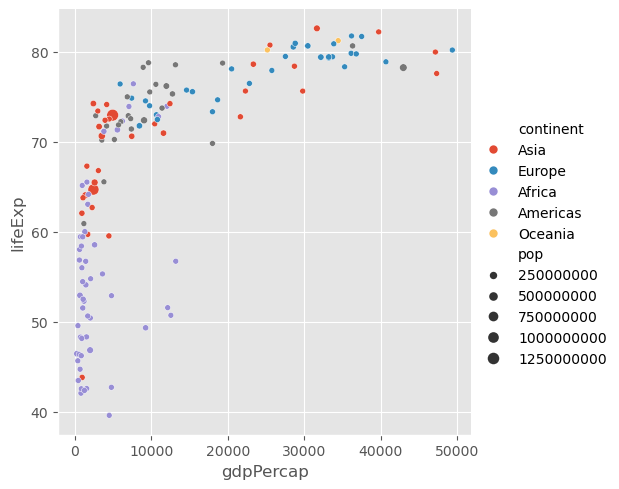

In [12]:
sns.relplot(data=gap_2007, x='gdpPercap', y='lifeExp', kind='scatter',
            size='pop', hue='continent')
plt.show()

### 🎯 **Q02 : Heatmap of Average Passengers per Month (Flights Dataset)**

1. **Dataset:** Seaborn `flights` Dataset

2. **Task Description:**

   * Load the `flights` dataset available in seaborn.
   * Group the data by `year` and `month`.
   * Compute the average number of passengers for each month across each year.
   * Reshape the data appropriately to create a matrix suitable for a heatmap.
   * Plot a heatmap where:

     * Rows represent months.
     * Columns represent years.
     * Cell values indicate the average number of passengers.
   * Add a color bar, labels, and a title for better interpretation.

3. **Expected Outcome:**
   A heatmap visualizing the average monthly passenger counts for each year using the seaborn `flights` dataset.


**LOADING FLIGHTS**

In [15]:
flights_df = sns.load_dataset('flights')

**PREPARATION**

In [29]:
avg_df = flights_df.pivot_table(index='year', columns='month', values='passengers', aggfunc='mean', observed=True)

**PLOTTING**

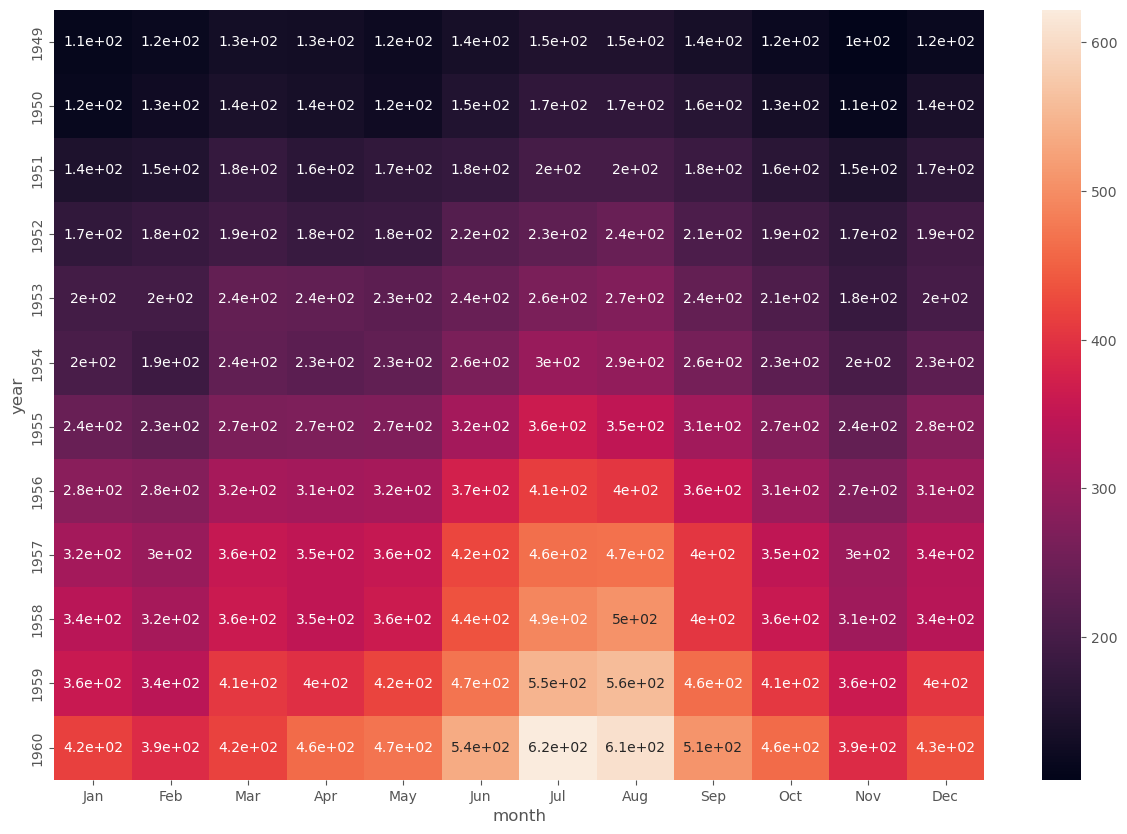

In [39]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=avg_df, annot=True)
plt.show()

### 🎯 **Q03 : Clustermap of Passengers by Month and Year (Flights Dataset)**

1. **Dataset:** Seaborn `flights` Dataset

2. **Task Description:**

   * Load the `flights` dataset provided by seaborn.
   * Transform the data into a matrix with:

     * Rows representing months.
     * Columns representing years.
     * Cell values representing the number of passengers.
   * Create a **clustermap** to analyze patterns and similarities across months and years based on passenger counts.
   * Enable hierarchical clustering for both rows and columns.
   * Add appropriate labels and a title to improve interpretability.

3. **Expected Outcome:**
   A clustermap that reveals clustering patterns among months and years based on passenger traffic in the seaborn `flights` dataset.


In [14]:
flights_df = sns.load_dataset('flights')

In [40]:
avg_df = flights_df.pivot_table(index='year', columns='month', values='passengers', aggfunc='mean', observed=True)

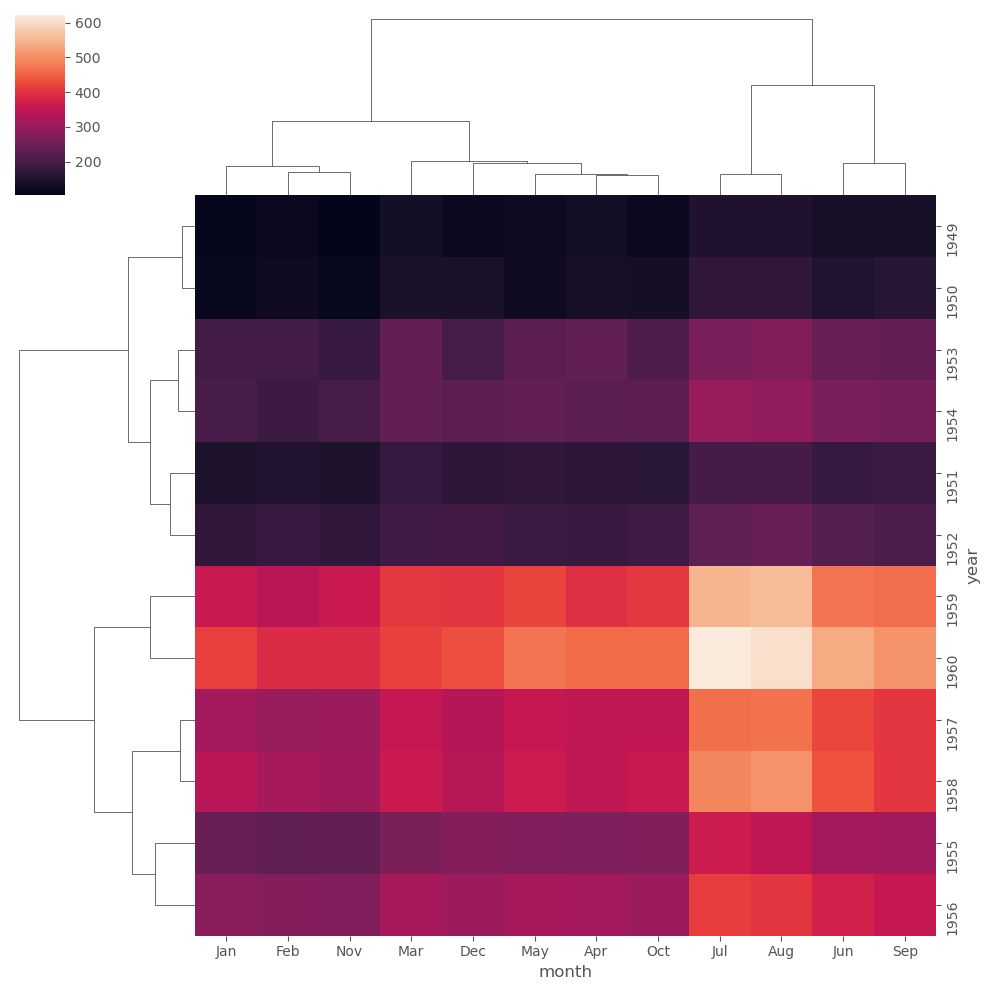

In [47]:
sns.clustermap(data=avg_df)
plt.show()

### ⚠️ **Data Warning**  
For the question ahead, we will be using an insurance dataset.  
Download Link : [Link](https://docs.google.com/spreadsheets/d/e/2PACX-1vQVpcVtdYdZU4zU4-lqxt-iPHkyndDWs_aqEDUu9ZodlJ48Dku0PFgdXlj2N5RCmwXJrNtZLsI_wEVf/pub?gid=220677750&single=true&output=csv)  
Details : [Kaggle](https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health)  
**NOTE :** If the link fails, you can search for the data in the [Data](../Resources/Data/) folder.

In [48]:
ins_df = pd.read_csv('../Resources/Data/insurance_data.csv')

### 🎯 **Q04 : Scatter Plot of Age vs BMI with Conditional Filtering**

1. **Dataset:** Insurance Dataset

2. **Task Description:**

   * Load the dataset containing at least the columns: `age`, `bmi`, `diabetic`, `gender`, and `smoker`.
   * Filter the data such that:

     * `age` is less than the **70th percentile** of the age column.
     * `bmi` is greater than the **average BMI** calculated from the age-filtered dataset.
   * Create a scatter plot with:

     * X-axis as `age`.
     * Y-axis as `bmi`.
   * Map visual encodings as follows:

     * `hue` based on the `diabetic` column.
     * `size` based on the `gender` column.
     * `style` based on the `smoker` column.
   * Add an appropriate title to the chart for clarity.

3. **Expected Outcome:**
   A scatter plot showing the relationship between age and BMI under specified conditions, with visual distinctions based on diabetic status, gender, and smoking habits.


**FILTERING**

In [56]:
age_df = ins_df[ins_df['age'] < ins_df['age'].quantile(q=0.70)]
bmi_df = age_df[age_df['bmi'] > age_df['bmi'].mean()]

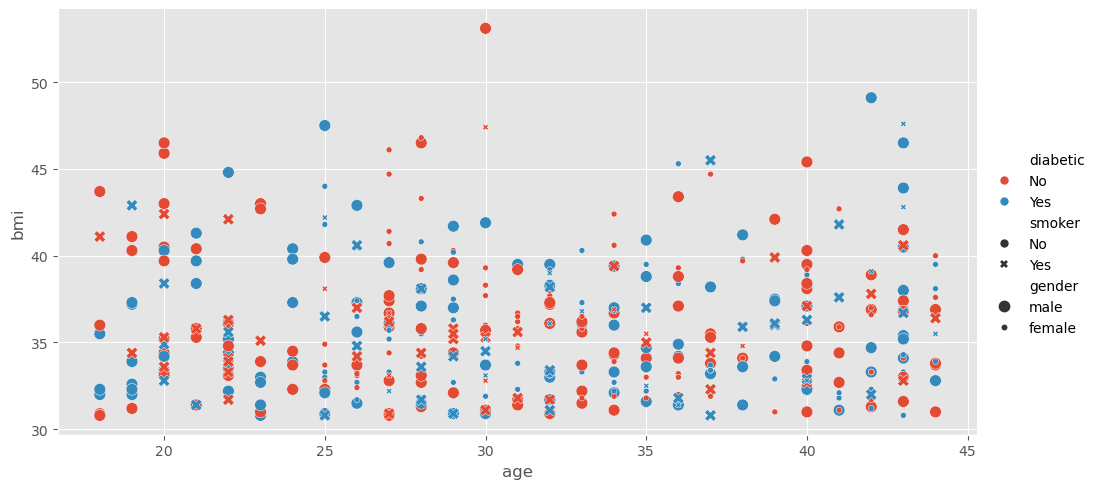

In [64]:
sns.relplot(data=bmi_df, x='age', y='bmi', kind='scatter',
            hue='diabetic', size='gender', style='smoker',
            aspect=2)
plt.show()

### 🎯 **Q05 : Line Plot of Blood Pressure vs Number of Children**

1. **Dataset:** Insurance Dataset

2. **Task Description:**

   * Load the dataset containing at least the columns: `bloodpressure`, `children`, and `smoker`.
   * Filter the data to include only records where:

     * `bloodpressure` values are between **90 and 100**, inclusive.
   * Create a line plot with:

     * X-axis representing `children`.
     * Y-axis representing `bloodpressure`.
   * Display details of the `smoker` column by using it as a grouping variable (e.g., separate lines or legend categories).
   * Add appropriate axis labels, legend, and a title to enhance readability.

3. **Expected Outcome:**
   A line plot illustrating blood pressure trends across the number of children for individuals with blood pressure values between 90 and 100, categorized by smoking status.


In [65]:
filtered_df = ins_df[(ins_df['bloodpressure'] >= 90) & (ins_df['bloodpressure'] <= 100)]

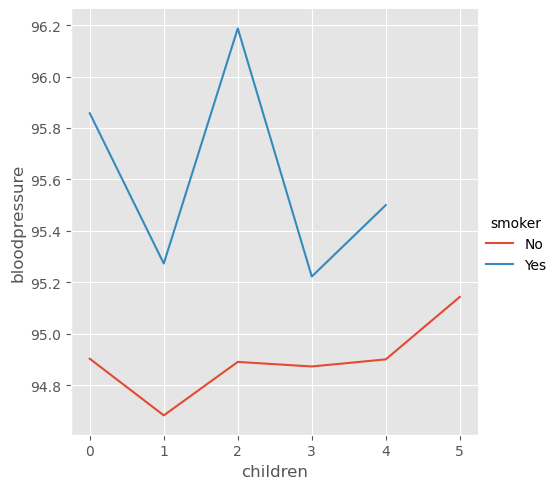

In [76]:
sns.relplot(data=filtered_df, x='children', y='bloodpressure', kind='line',
            hue='smoker', err_style=None)
plt.show()

### 🎯 **Q06 : Histogram of Age Distribution by Smoker Status and Gender**

1. **Dataset:** Insurance Dataset

2. **Task Description:**

   * Load the dataset containing at least the columns: `age`, `smoker`, and `gender`.
   * Create a histogram using **`displot`** based on the `age` column.
   * Use the `smoker` column as the **hue** to differentiate smoker and non-smoker distributions.
   * Split the visualization into **two separate side-by-side charts** based on the `gender` column.
   * Add appropriate labels, legend, and titles for better clarity.

3. **Expected Outcome:**
   Two side-by-side histograms showing the age distribution, distinguished by smoker status, separately for each gender.


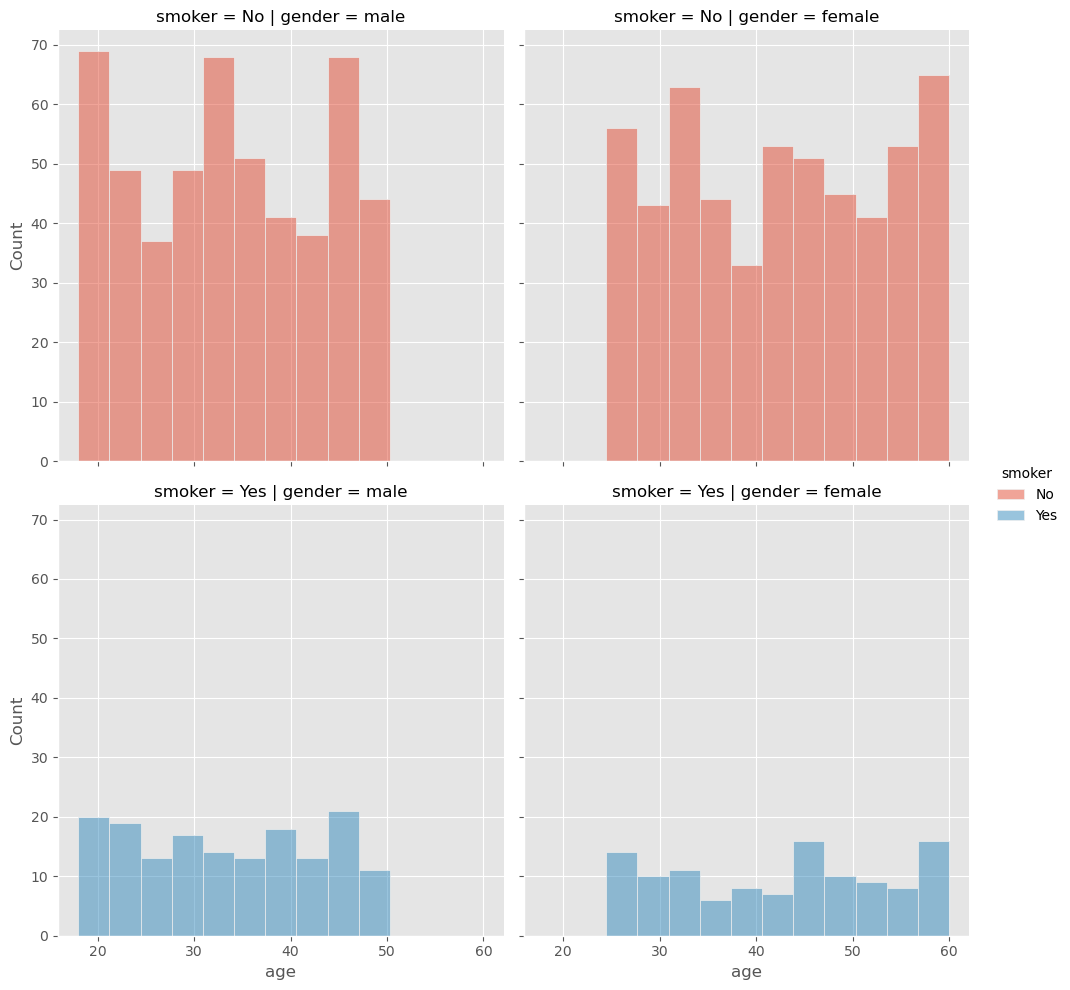

In [79]:
sns.displot(data=ins_df, x='age', kind='hist',
            hue='smoker', col='gender', row='smoker')
plt.show()

### 🎯 **Q07 : KDE Plot of Age vs Blood Pressure**

1. **Dataset:** Insurance Dataset

2. **Task Description:**

   * Load the dataset containing at least the columns: `age` and `bloodpressure`.
   * Create a **Kernel Density Estimation (KDE) plot** to visualize the joint distribution of:

     * `age` on the X-axis.
     * `bloodpressure` on the Y-axis.
   * Choose appropriate bandwidth or contour levels (if applicable) to clearly represent density regions.
   * Add axis labels and a descriptive title to the plot.

3. **Expected Outcome:**
   A KDE plot illustrating the density-based relationship between age and blood pressure.


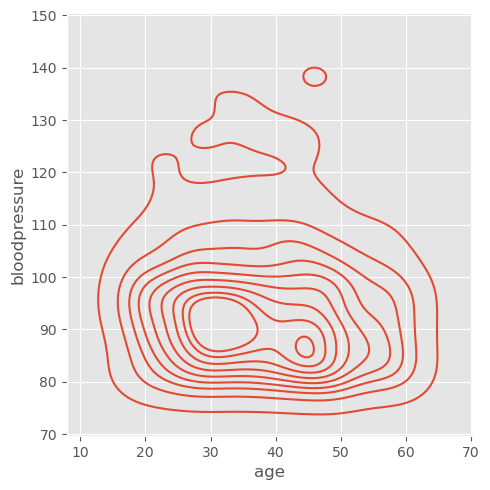

In [80]:
sns.displot(data=ins_df, x='age', y='bloodpressure', kind='kde')
plt.show()

### 🎯 **Q08 : Clustermap of Age, BMI, and Blood Pressure**

1. **Dataset:** Insurance Dataset

2. **Task Description:**

   * Load the dataset containing the columns: `age`, `bmi`, and `bloodpressure`.
   * Select only these numerical features for analysis.
   * Optionally normalize or standardize the data to ensure fair distance calculations.
   * Create a **clustermap** to visualize similarity patterns among observations based on:

     * `age`
     * `bmi`
     * `bloodpressure`
   * Enable hierarchical clustering and display dendrograms for better interpretation.
   * Add an appropriate title to the visualization.

3. **Expected Outcome:**
   A clustermap showing clustering patterns based on age, BMI, and blood pressure values.


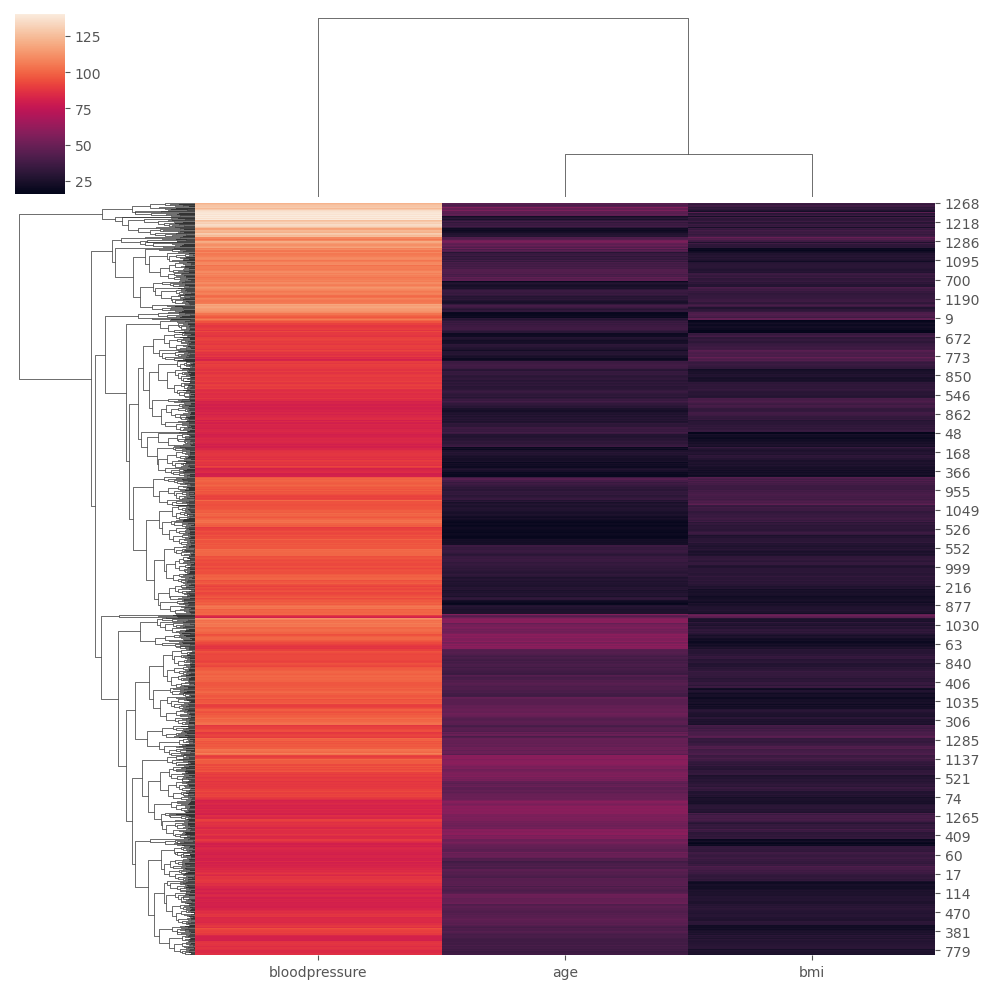

In [84]:
sns.clustermap(data=ins_df[['age', 'bmi', 'bloodpressure']].dropna())
plt.show()